In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import pandas as pd
import numpy as np

In [ ]:
import seaborn as sns

In [3]:
sns.set()

### Plotting the PTB negatives

In [4]:
interval = [64,128, 256, 512]
negs_rff_nonnormalize = [211889313, 212831839,  212656936, 212513185]
ang_hyb_att_nonnormalize = [125652463, 130217538, 125540229, 129610217]
ang_gau_att_nonnormalize = [127416067, 131112075, 130053172, 124356581]

In [48]:
f=pd.DataFrame({"RFF":negs_rff_nonnormalize ,"Angular Hybrid":ang_hyb_att_nonnormalize,"Gaussian Hybrid":ang_gau_att_nonnormalize,"Random Features":interval}, index=[64,128, 256, 512])


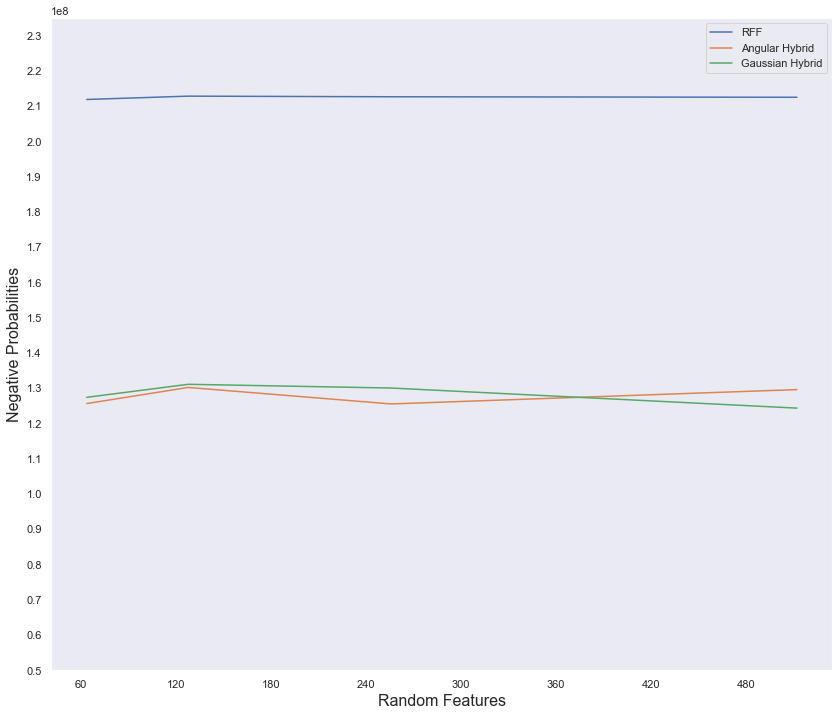

In [6]:
ax = f.plot(kind='line', x="Random Features", y=["RFF", "Angular Hybrid", "Gaussian Hybrid"],figsize=(14,12),lw=1.5,grid=False)
loc = plticker.MultipleLocator(base=60.0) # this locator puts ticks at regular intervals
loc2 = plticker.MultipleLocator(base=10000000.0)
ax.set_ylim(0.5e8, 2.35e8)
ax.set_ylabel("Negative Probabilities", fontsize=16)
ax.set_xlabel("Random Features", fontsize=16)
ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(loc2)
# fig = ax.figure
# fig.savefig('Negatives_dot_product.png', dpi=800, bbox_inches='tight')

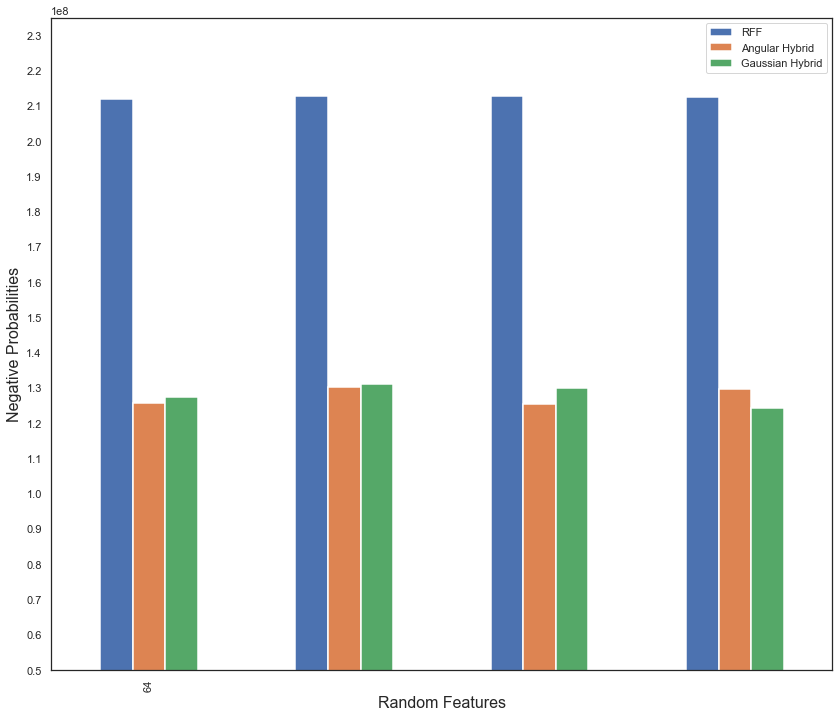

In [7]:
sns.set(style="white")
ax = f.plot.bar(x="Random Features", y=["RFF", "Angular Hybrid", "Gaussian Hybrid"],figsize=(14,12),lw=1.5,grid=False)
#loc = plticker.MultipleLocator(base=60.0) # this locator puts ticks at regular intervals
loc2 = plticker.MultipleLocator(base=10000000.0)
ax.set_ylim(0.5e8, 2.35e8)
ax.set_ylabel("Negative Probabilities", fontsize=16)
ax.set_xlabel("Random Features", fontsize=16)
ax.xaxis.set_major_locator(loc)
ax.yaxis.set_major_locator(loc2)

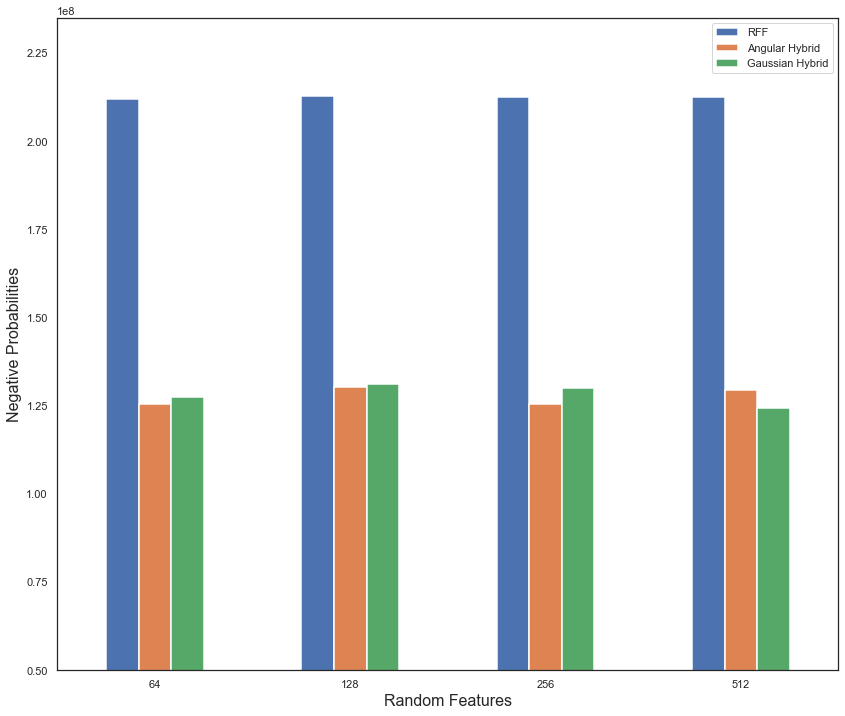

In [8]:
ax = f.plot(kind='bar', x="Random Features", y=["RFF", "Angular Hybrid", "Gaussian Hybrid"],figsize=(14,12),lw=1.5,grid=False, rot=0)
#loc = plticker.MultipleLocator(base=60.0) # this locator puts ticks at regular intervals
#loc2 = plticker.MultipleLocator(base=10000000.0)
ax.set_ylim(0.5e8, 2.35e8)
ax.set_ylabel("Negative Probabilities", fontsize=16)
ax.set_xlabel("Random Features", fontsize=16)
# ax.xaxis.set_major_locator(loc)
# ax.yaxis.set_major_locator(loc2)
fig = ax.figure
fig.savefig('Negatives_dot_product_PTB.png', dpi=800, bbox_inches='tight')

In [9]:
# import seaborn as sns
# sns.set_theme(style="whitegrid")
# tips = sns.load_dataset("tips")
# ax = sns.barplot(x="day", y="total_bill", data=tips)

### WIKITEXT RESULTS HERE: 

In [10]:
#WIKITEXT RMSE - Experiment: 1: DATA
interval = [64, 128, 256, 512]
pos = [6.71774586029678e-05, 6.668258977113842e-05, 6.591257619533248e-05, 6.570230813346177e-05 ]
rff = [0.002510992339306854,0.008861510484585174, 0.0017024372835308594, 0.0005330275311766973 ]
ang_hyb = [0.0017879415001151482, 0.000632073322799761, 0.0005704654007303862, 0.0001650589214650127]
gau_hyb = [0.0009875542901056698, 0.00016260047426742842, 0.0003611775200616208, 0.00010143317283852406 ]

In [41]:
f=pd.DataFrame({"RFF":rff ,"Angular Hybrid":ang_hyb,"Gaussian Hybrid":gau_hyb,"FAVOR+":pos,"Random Features":interval}, index=[64,128, 256, 512])


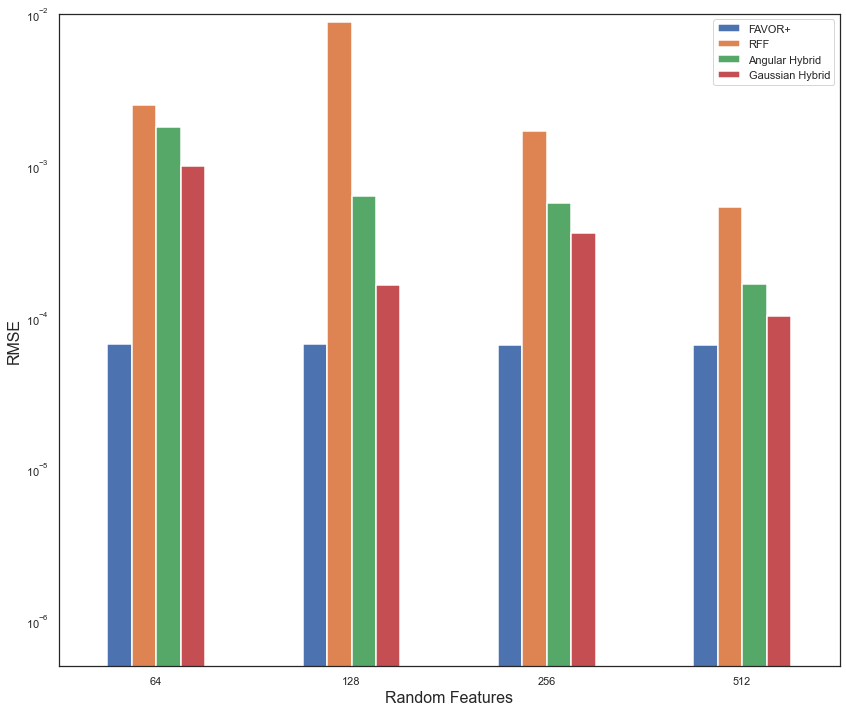

In [37]:
ax = f.plot(kind='bar', x="Random Features", y=["FAVOR+", "RFF", "Angular Hybrid", "Gaussian Hybrid"],figsize=(14,12),lw=1.5,grid=False, rot=0, logy=True)
#loc = plticker.MultipleLocator(base=60.0) # this locator puts ticks at regular intervals
#loc2 = plticker.MultipleLocator(base=10000000.0)
ax.set_ylim(5e-7, 1e-2)
ax.set_ylabel("RMSE", fontsize=16)
ax.set_xlabel("Random Features", fontsize=16)
# ax.xaxis.set_major_locator(loc)
# ax.yaxis.set_major_locator(loc2)
fig = ax.figure
fig.savefig('RMSE_Wikitext', dpi=800, bbox_inches='tight')

# 1D WASS DATA FOR WIKITEXT AND NEGATIVES

In [82]:
### 1D WASS RESULTS
#logging values: 1D Wass
interval = [64, 128, 256, 512]
pos = [12970.384823364666, 12972.673418642305, 12965.820106569288, 12954.066912895449]
trig = [12913.596870410449, 12912.654291790719, 12911.918461791027, 12913.251237722678]
neg_trig = [170011020, 169781102, 169471277, 168332617]
neg_ang = [169023209, 174220014,  170683259, 170256781]
ang_hyb = [12589.068702651282, 12510.832385540252, 12644.13867300468, 12782.935317533791]
neg_gau = [328413242, 330377707, 325393811, 321452998]
gau_hyb = [12806.37339440076, 12800.683737021773, 12807.554368761936, 12813.270935008519 ]

In [83]:
df = pd.DataFrame({
    'Factor': ['64', '128', '256', '512'],
    'Favor+': pos,
    'RFF': trig,
    'Gaussian Hybrid': gau_hyb,
    'Angular Hybrid': ang_hyb
})

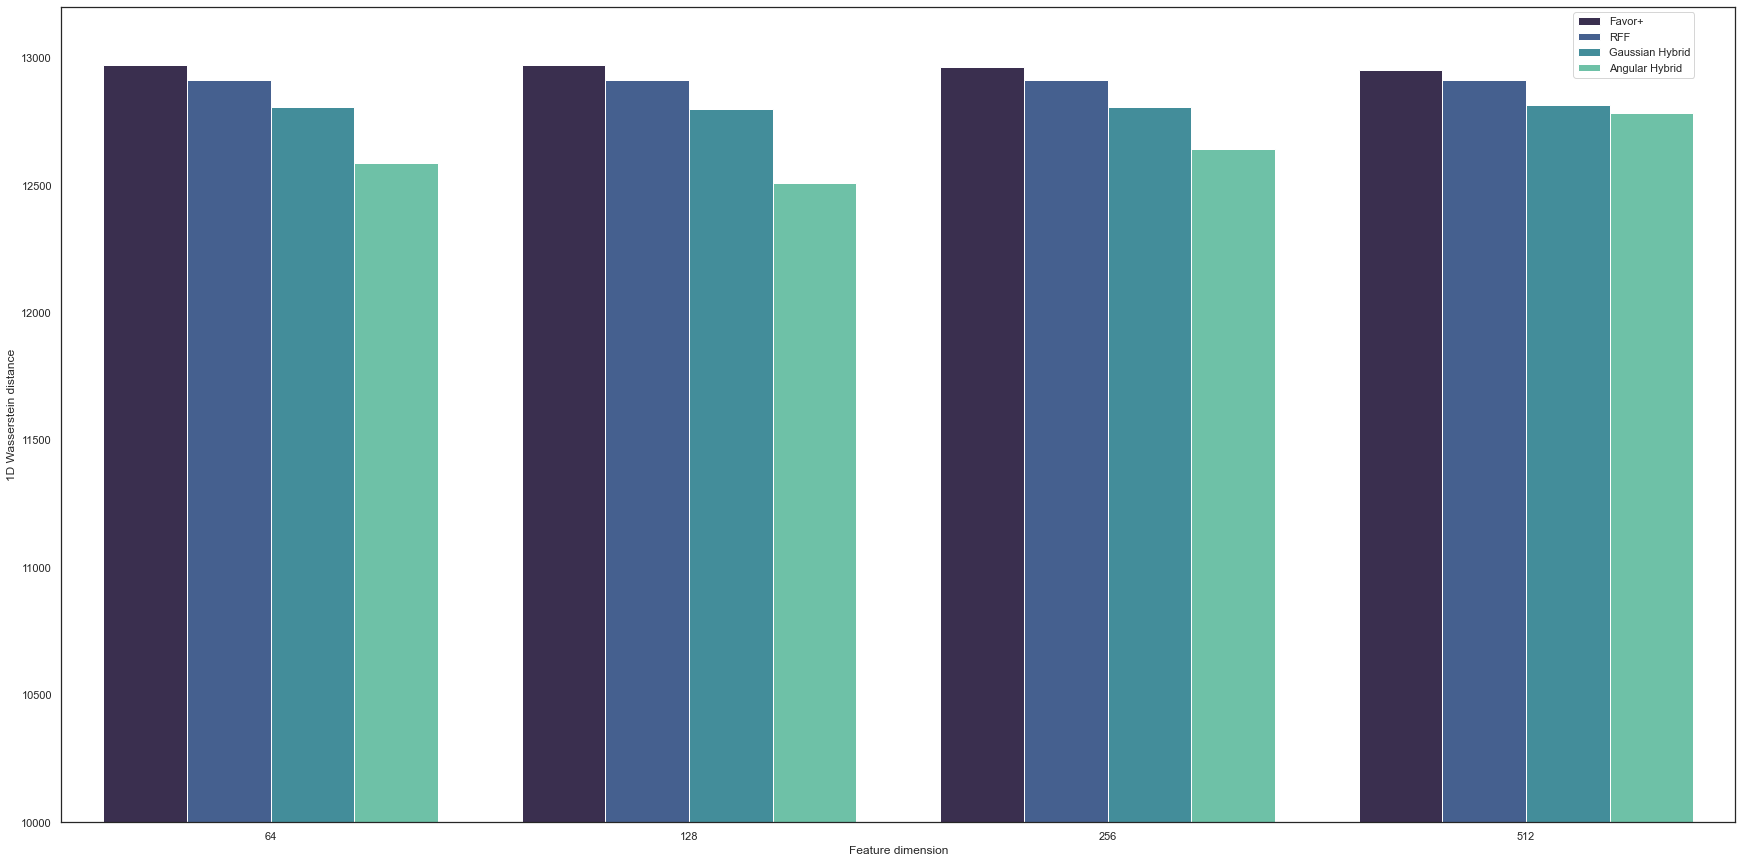

In [84]:
sns.set(style="white")
fig, ax1 = plt.subplots(figsize=(30,15))
ax1.set_ylim(10000, 13200)
tidy = df.melt(id_vars='Factor').rename(columns=str.title)
# print(tidy)
sns.barplot(x='Factor', y='Value', hue='Variable', data=tidy, ax=ax1, palette="mako")
ax1.set(xlabel='Feature dimension', ylabel='1D Wasserstein distance')
ax1.set
#sns.despine(fig)
plt.legend(bbox_to_anchor=(0.9, 1), loc='upper left')
#plt.savefig('Wass_dist.png', dpi = 300)
plt.show()

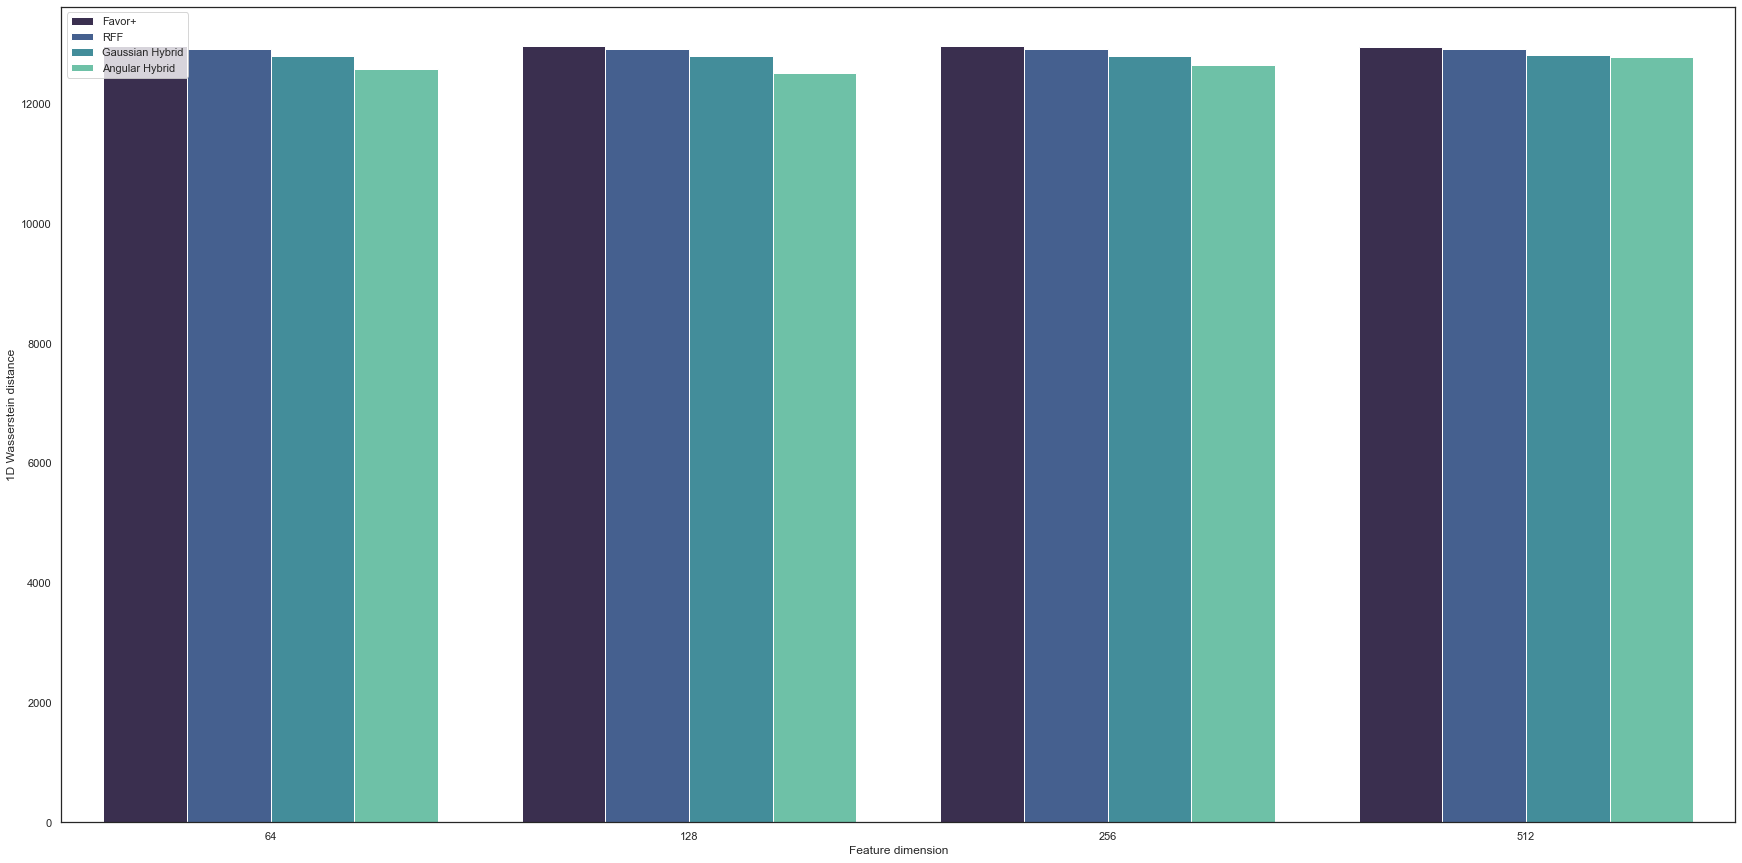

In [85]:
sns.set(style="white")
fig, ax1 = plt.subplots(figsize=(30, 15))
tidy = df.melt(id_vars='Factor').rename(columns=str.title)
sns.barplot(x='Factor', y='Value', hue='Variable', data=tidy, ax=ax1, palette="mako")
ax1.set(xlabel='Feature dimension', ylabel='1D Wasserstein distance')
ax1.set
#sns.despine(fig)
plt.legend(loc='upper left')
#plt.savefig('Wass_dist.png', dpi = 300)
plt.show()

In [86]:
tidy

,Factor,Variable,Value
0,64,Favor+,12970.384823
1,128,Favor+,12972.673419
2,256,Favor+,12965.820107
3,512,Favor+,12954.066913
4,64,RFF,12913.596870
5,128,RFF,12912.654292
6,256,RFF,12911.918462
7,512,RFF,12913.251238
8,64,Gaussian Hybrid,12806.373394
9,128,Gaussian Hybrid,12800.683737


In [87]:
df_negs = pd.DataFrame({
    'Factor': ['64', '128', '256', '512'],
    'RFF': neg_trig,
    'Gaussian Hybrid': neg_gau,
    'Angular Hybrid': neg_ang
})

   Factor         Variable      Value
0      64              RFF  170011020
1     128              RFF  169781102
2     256              RFF  169471277
3     512              RFF  168332617
4      64  Gaussian Hybrid  328413242
5     128  Gaussian Hybrid  330377707
6     256  Gaussian Hybrid  325393811
7     512  Gaussian Hybrid  321452998
8      64   Angular Hybrid  169023209
9     128   Angular Hybrid  174220014
10    256   Angular Hybrid  170683259
11    512   Angular Hybrid  170256781


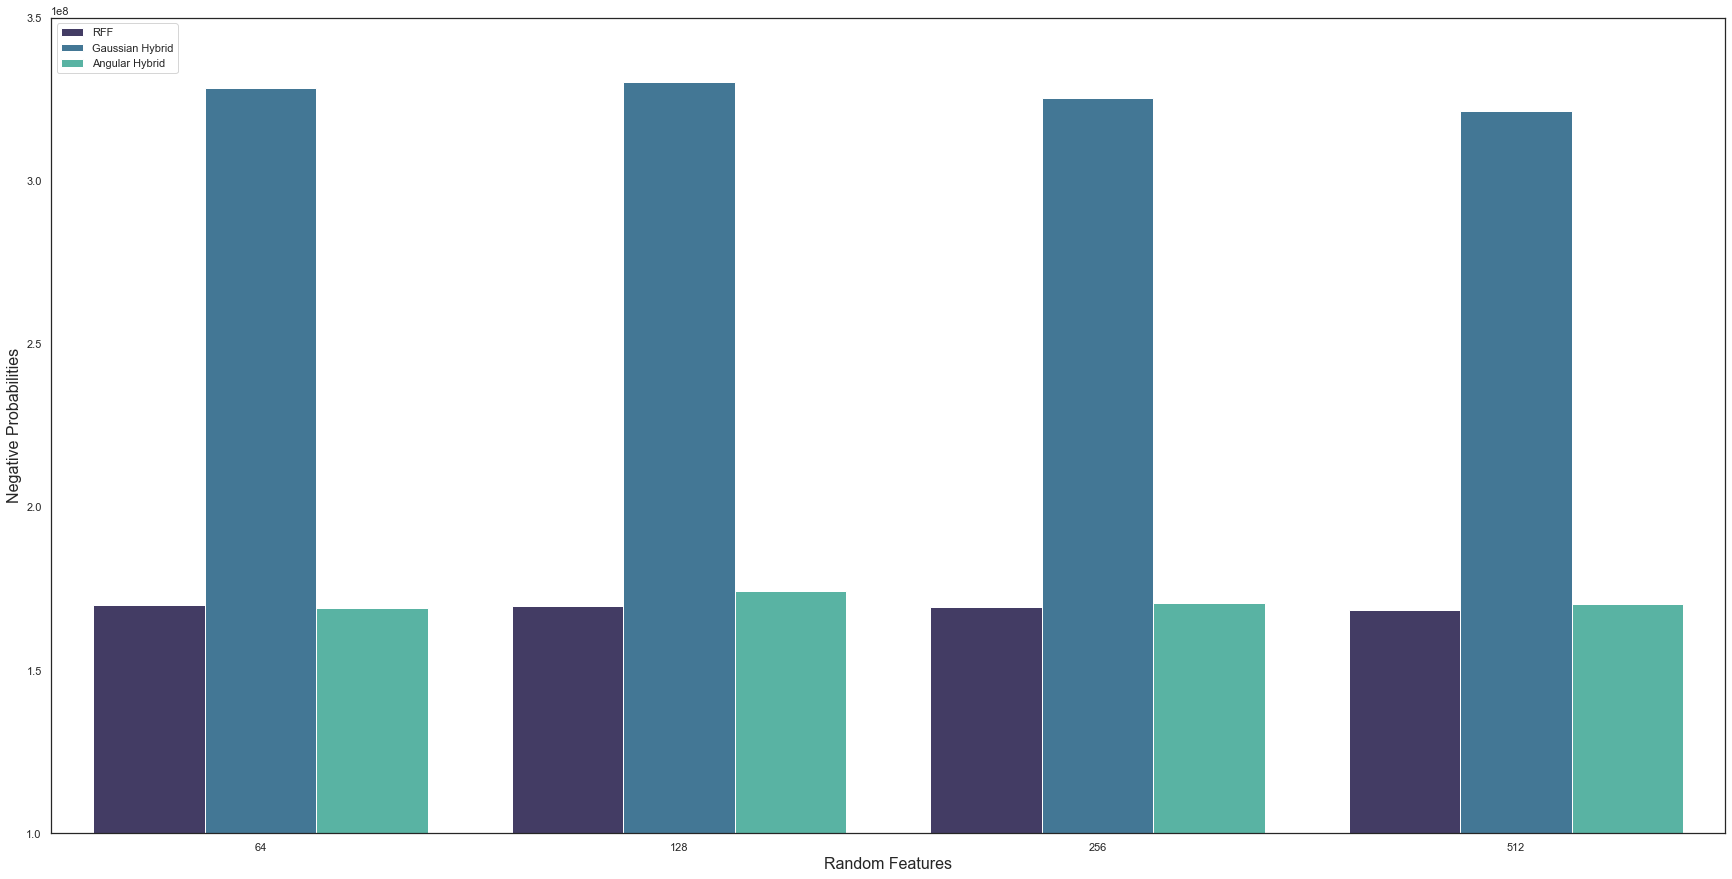

In [92]:
# ax = df_negs.plot(kind='bar', x="Factor", y=["RFF", "Angular Hybrid", "Gaussian Hybrid"],figsize=(14,12),lw=1.5,grid=False, rot=0)
#loc = plticker.MultipleLocator(base=60.0) # this locator puts ticks at regular intervals
#loc2 = plticker.MultipleLocator(base=10000000.0)
sns.set(style="white")
fig, ax1 = plt.subplots(figsize=(30, 15))
tidy = df_negs.melt(id_vars='Factor').rename(columns=str.title)
print(tidy)
sns.barplot(x='Factor', y='Value', hue='Variable', data=tidy, ax=ax1, palette="mako")
ax1.set(xlabel='Feature dimension', ylabel='1D Wasserstein distance')
ax1.set
#sns.despine(fig)
plt.legend(loc='upper left')
#plt.savefig('Wass_dist.png', dpi = 300)


ax1.set_ylim(1e8, 3.5e8)
ax1.set_ylabel("Negative Probabilities", fontsize=16)
ax1.set_xlabel("Random Features", fontsize=16)
plt.show()
# ax.xaxis.set_major_locator(loc)
# ax.yaxis.set_major_locator(loc2)
# fig = ax.figure
# fig.savefig('Negatives_dot_product_PTB.png', dpi=800, bbox_inches='tight')

# WIKITEXT RMSE EXPT-2

In [31]:
#logging values: RMSE experiment 2:
interval = [64, 128, 256, 512]
pos = [0.0020341847955113296, 0.002034175816091012, 0.0020341665164156295, 0.0020341584700950058 ]
trig = [0.0021288536181766414, 0.0026233122510613866, 0.0025308707276191136, 0.0032405327439546986]
neg_trig = [171925325, 168501608, 170320479, 171150258]
neg_ang_hyb = [168760585, 172660176, 168836665, 169990839]
ang_hyb = [0.0028479491834868505, 0.002291154703943548, 0.0063364170409966085, 0.01018775316352155 ]
neg_gau_hyb = [335006668, 332124852, 326554473, 324234598 ]
gau_hyb = [0.006431744492456647, 0.013730974003258551, 0.005508342655612224, 0.011119984705488596 ]